In [2]:
#Requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [3]:
import kagglehub
path = kagglehub.dataset_download("abdelmalekeladjelet/sentiment-analysis-dataset")
print("Path to dataset files:", path)

100%|██████████| 8.68M/8.68M [00:01<00:00, 6.13MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/abdelmalekeladjelet/sentiment-analysis-dataset/versions/1


In [4]:
import kagglehub
import os
import pandas as pd
download_path = kagglehub.dataset_download("abdelmalekeladjelet/sentiment-analysis-dataset")

for root, _, files in os.walk(download_path):
    for file in files:
        if file.endswith(".csv"):
            csv_path = os.path.join(root, file)
            break

df = pd.read_csv(csv_path)
print("Loaded from:", csv_path)
df.head()

Loaded from: /kaggle/input/sentiment-analysis-dataset/sentiment_data.csv


,Unnamed: 0,Comment,Sentiment
0,0,lets forget apple pay required brand new iphon...,1
1,1,nz retailers don’t even contactless credit car...,0
2,2,forever acknowledge channel help lessons ideas...,2
3,3,whenever go place doesn’t take apple pay doesn...,0
4,4,apple pay convenient secure easy use used kore...,2


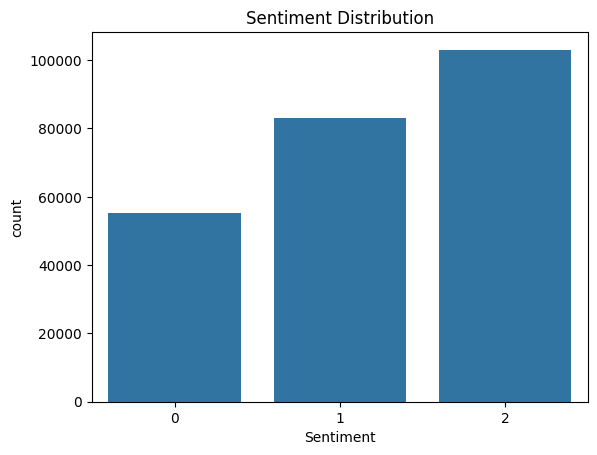

In [5]:
# Label distribution
sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

In [6]:
# Prepareing text and labels
X = df['Comment'].astype(str)
y = to_categorical(df['Sentiment'], num_classes=3)


In [7]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [8]:
# Tokenization
vocab_size = 30000
max_len = 100
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)

In [9]:
# Building the Model
def build_model():
    model = Sequential([
        Embedding(vocab_size, 128, input_length=max_len),
        Bidirectional(LSTM(64, return_sequences=True)),
        Conv1D(64, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = build_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Training
history = model.fit(X_train_seq, y_train, epochs=5, batch_size=256, validation_split=0.1)

Epoch 1/5
679/679 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.6607 - loss: 0.7682 - val_accuracy: 0.8295 - val_loss: 0.4544
Epoch 2/5
679/679 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.8500 - loss: 0.4165 - val_accuracy: 0.8340 - val_loss: 0.4418
Epoch 3/5
679/679 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.8779 - loss: 0.3383 - val_accuracy: 0.8335 - val_loss: 0.4638
Epoch 4/5
679/679 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9003 - loss: 0.2781 - val_accuracy: 0.8404 - val_loss: 0.4870
Epoch 5/5
679/679 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.9189 - loss: 0.2262 - val_accuracy: 0.8345 - val_loss: 0.5696


1508/1508 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78     11023
           1       0.83      0.85      0.84     16594
           2       0.87      0.87      0.87     20612

    accuracy                           0.84     48229
   macro avg       0.83      0.83      0.83     48229
weighted avg       0.84      0.84      0.84     48229



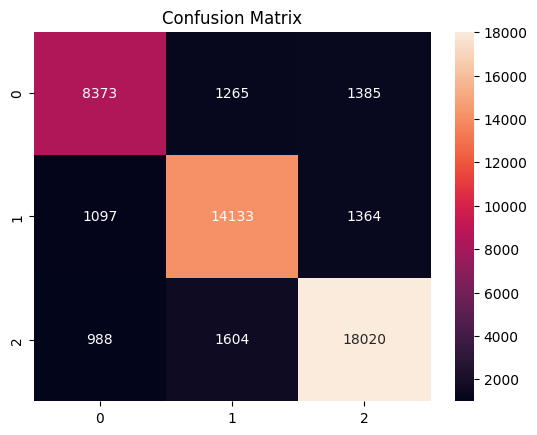

In [11]:
# Evaluating
y_pred = model.predict(X_test_seq)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:\n", classification_report(y_true, y_pred_labels))
sns.heatmap(confusion_matrix(y_true, y_pred_labels), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()